In [66]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [67]:
#Miscellaneous Imports
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions

In [68]:
diabetes  = pd.read_csv('diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [69]:
diabetes .info(verbose = 'True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [71]:
diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [72]:
# Replacing zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

diabetes_copy = diabetes.copy(deep=True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes_copy.isnull().sum())         

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


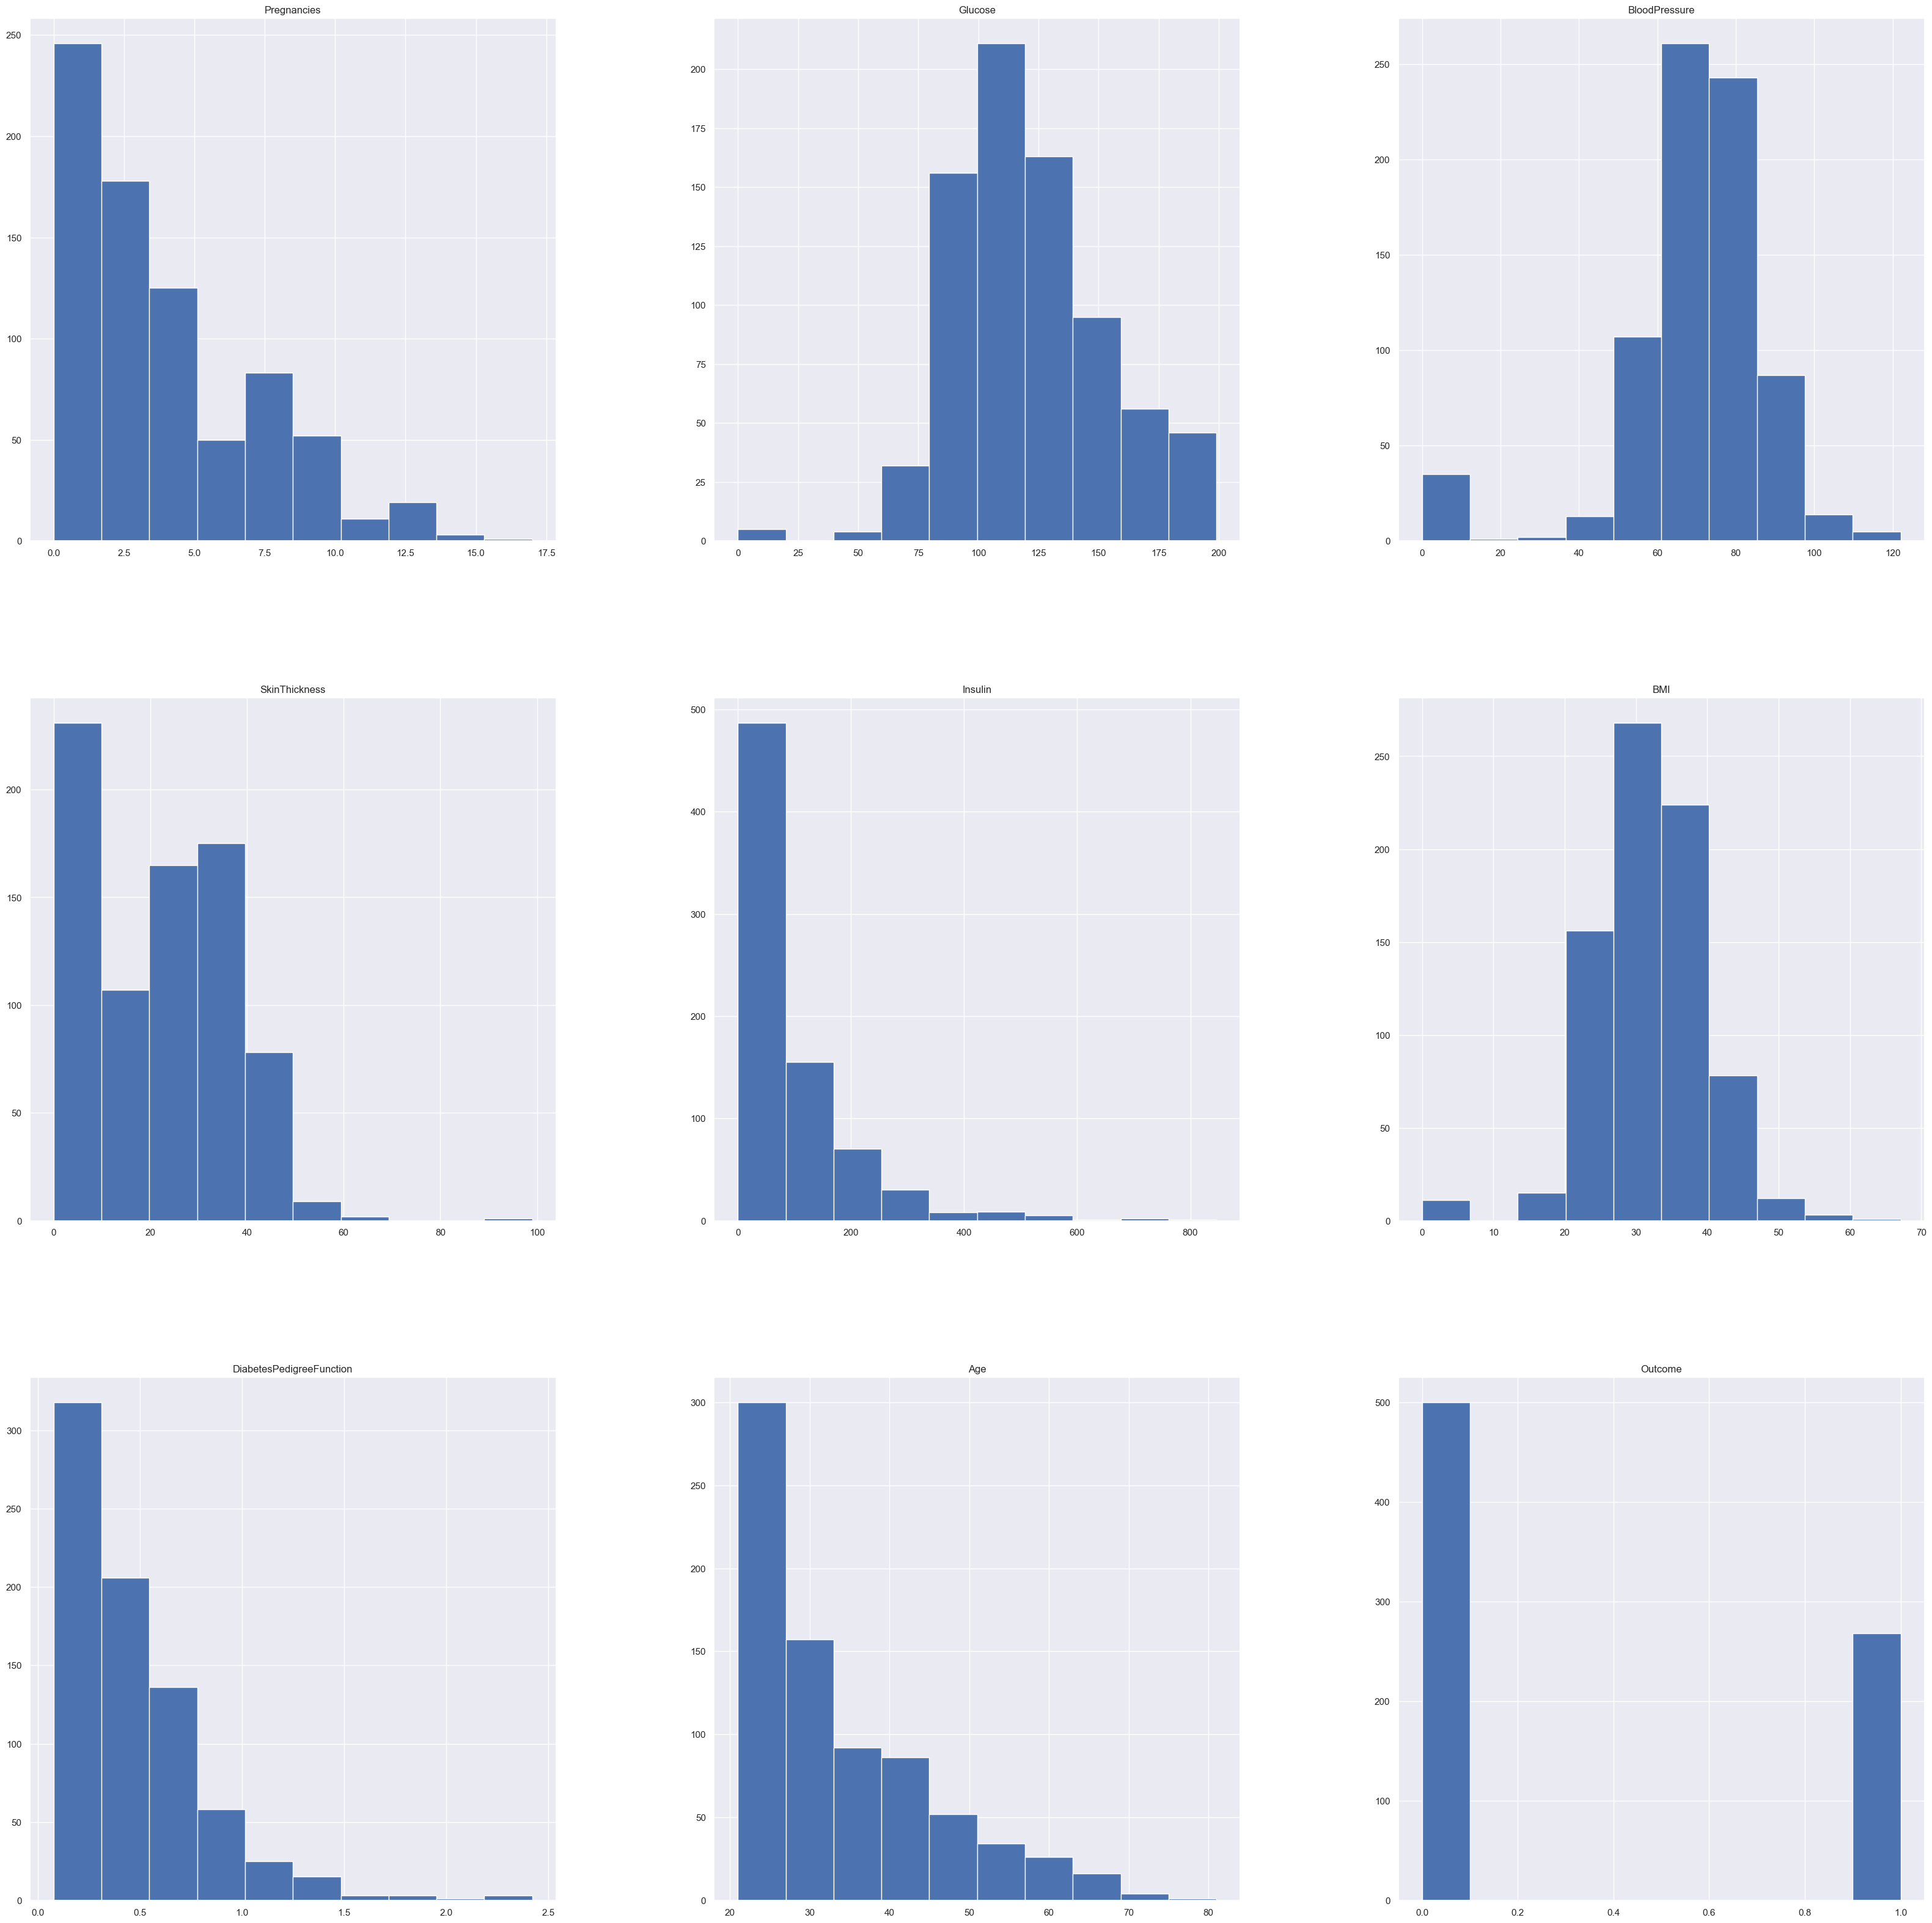

In [73]:
plots = diabetes.hist(figsize = (40,40))

In [74]:
diabetes.shape

(768, 9)

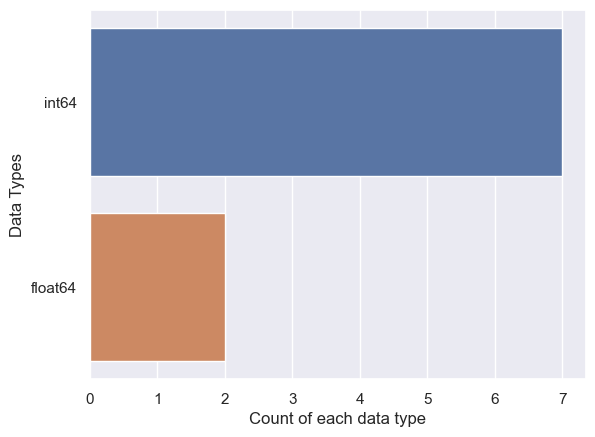

In [75]:
# Data type analysis
sns.countplot(y = diabetes.dtypes , data = diabetes)
plt.xlabel('Count of each data type')
plt.ylabel('Data Types')
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


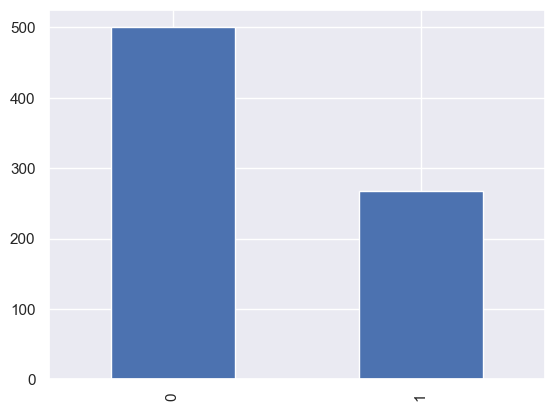

In [76]:
# Checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())
p=diabetes.Outcome.value_counts().plot(kind="bar")

In [77]:
#The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

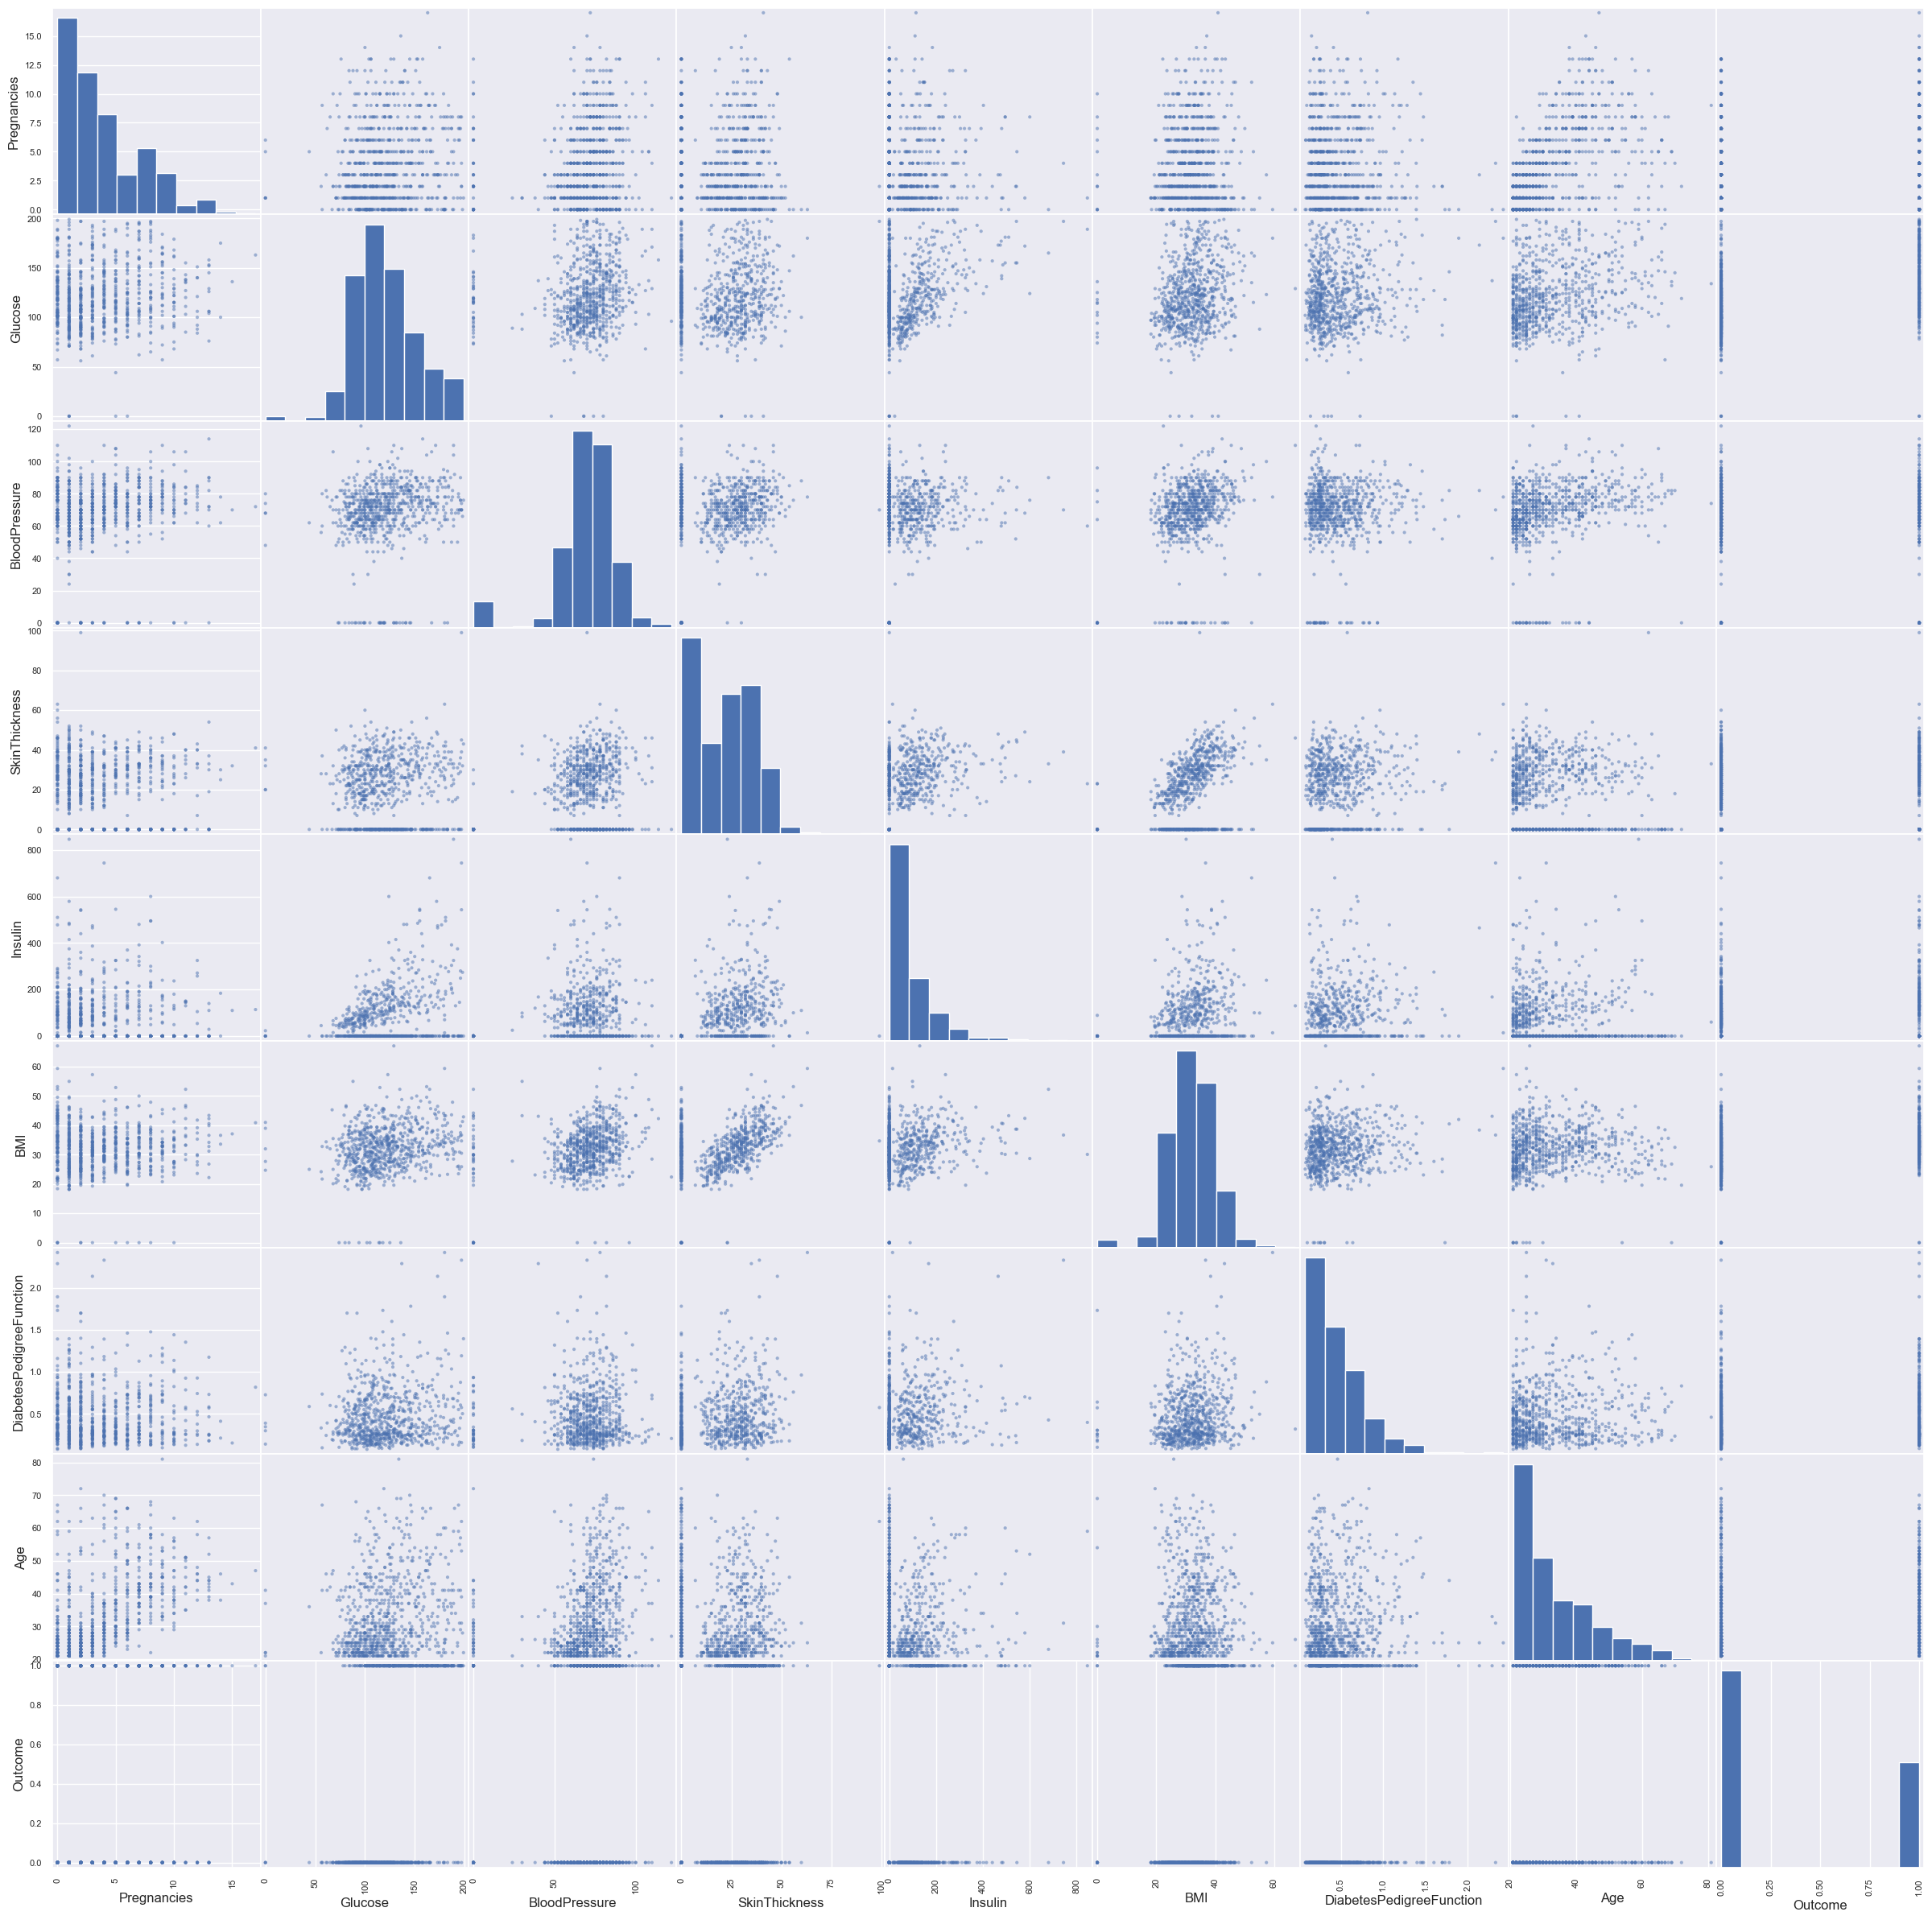

In [78]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes,figsize=(30, 30))

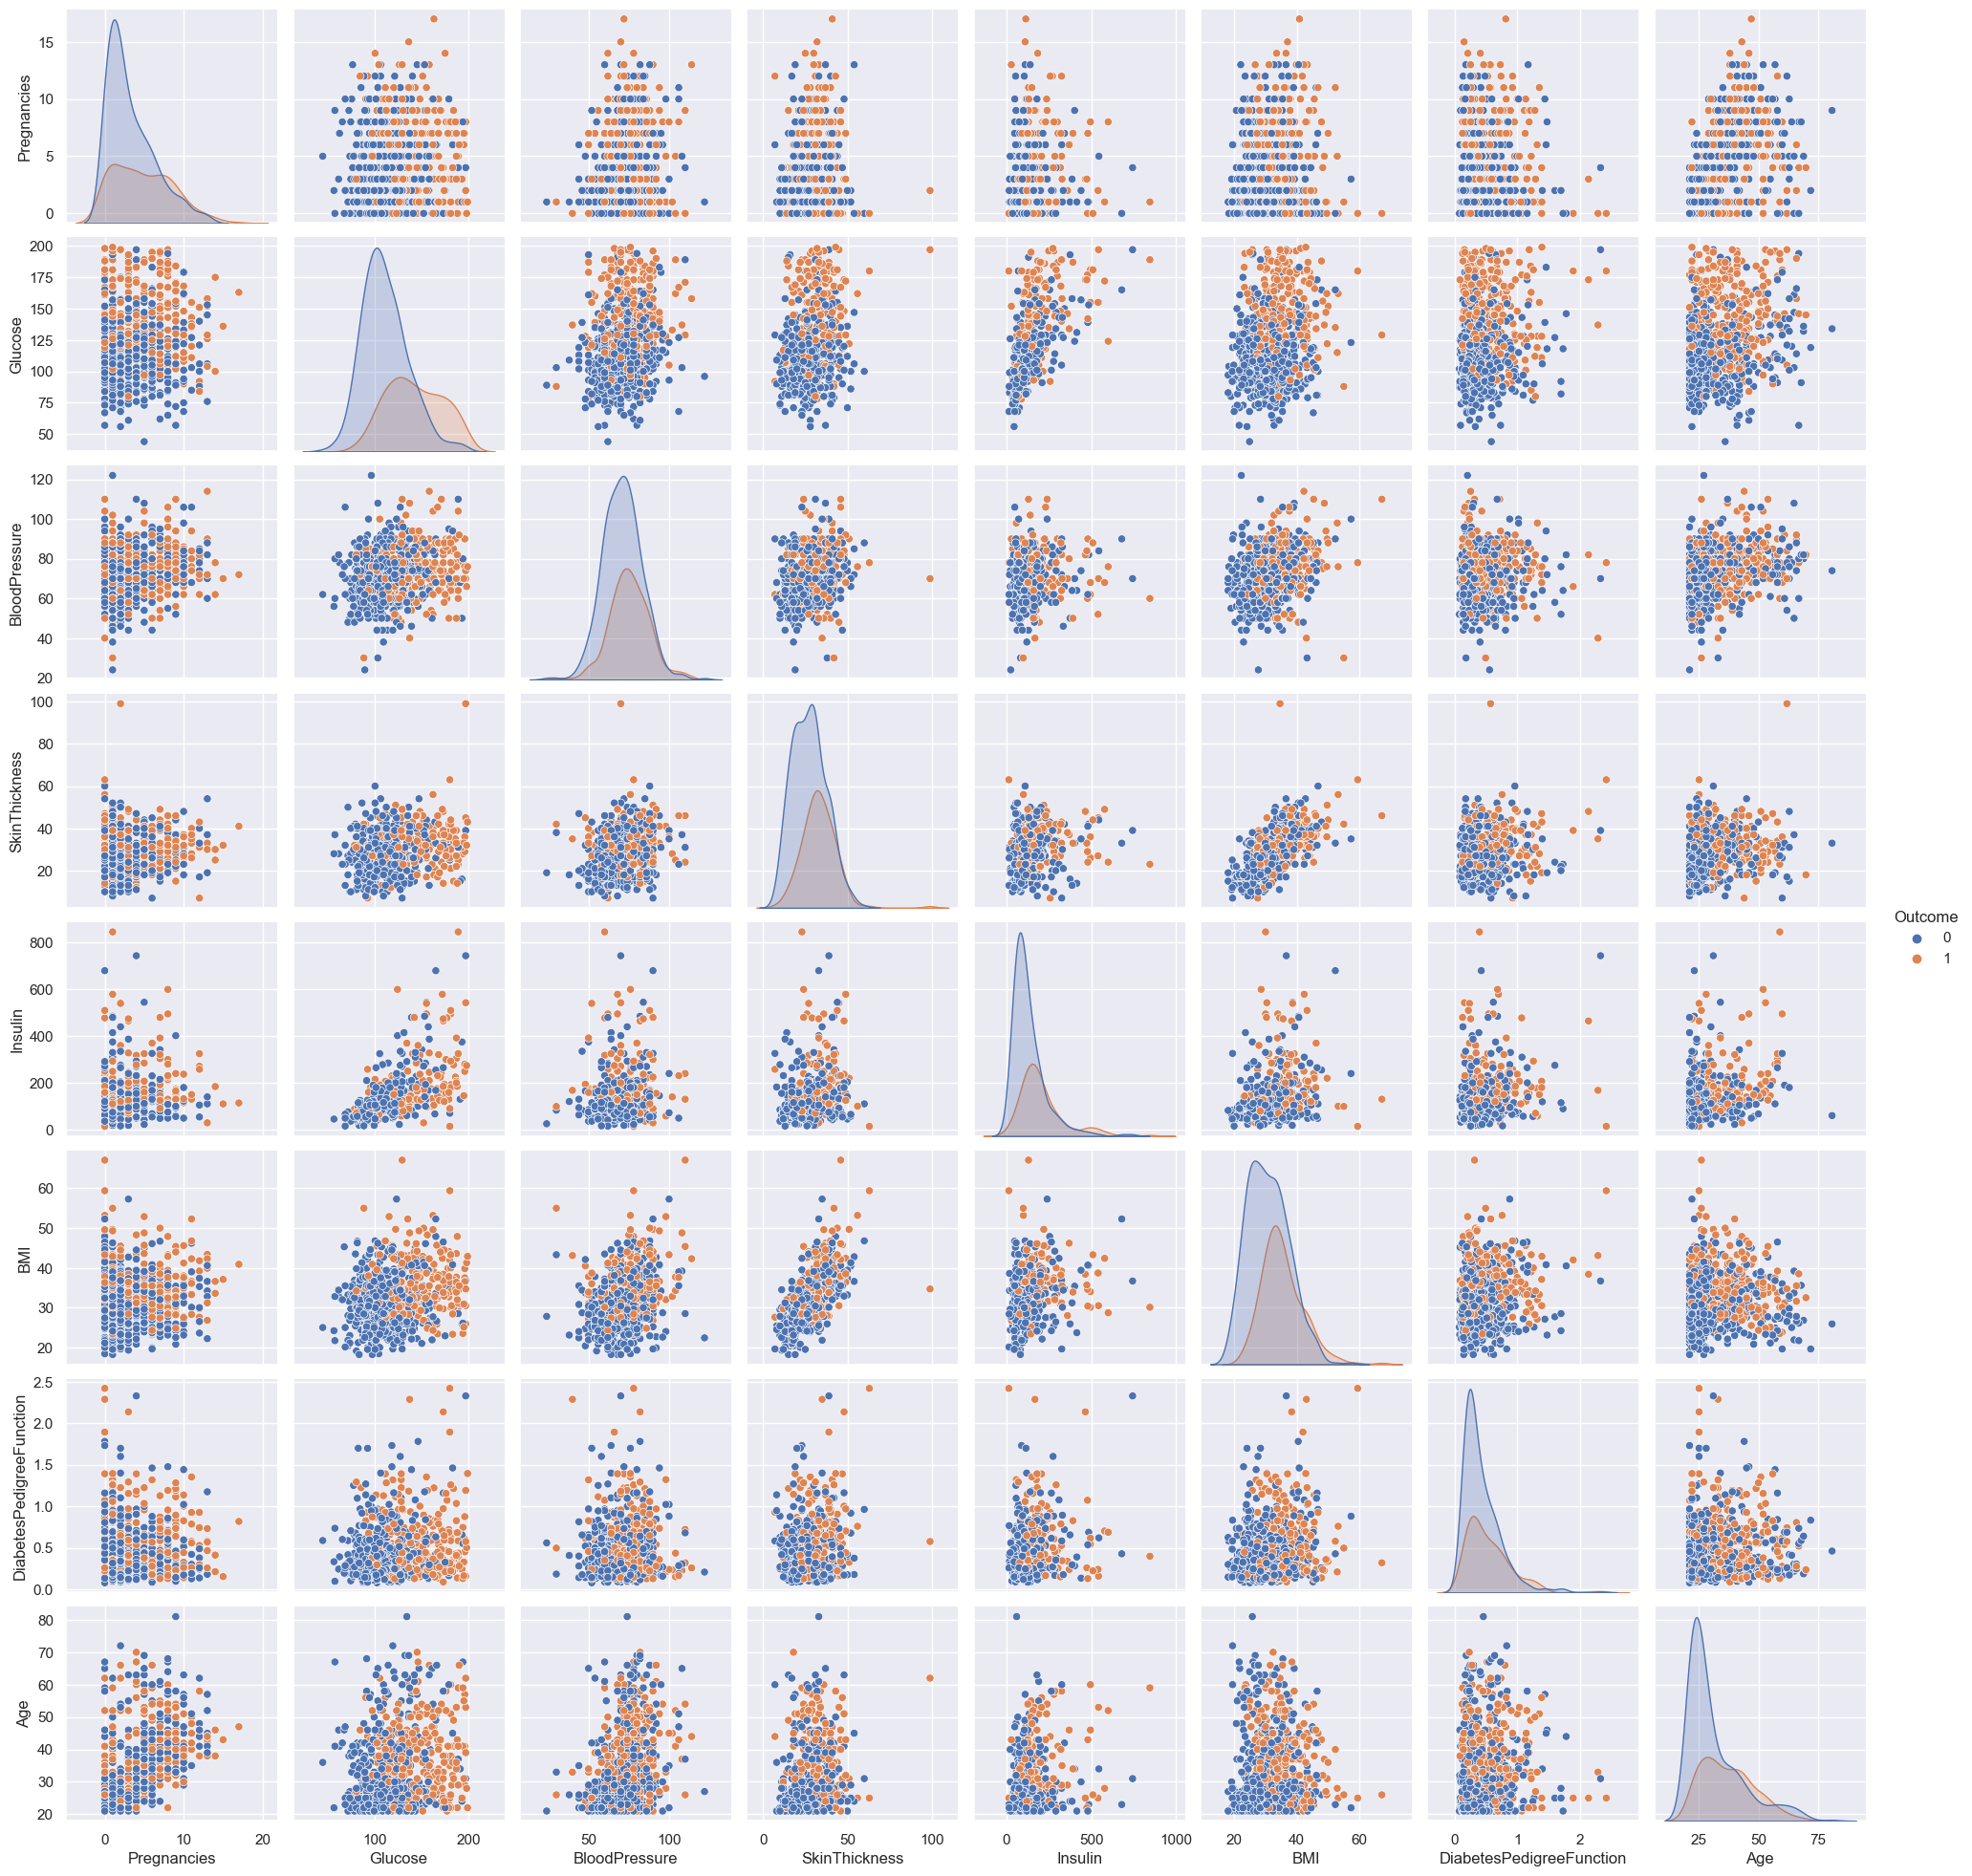

In [79]:
#Pairplots
p=sns.pairplot(diabetes_copy, hue = 'Outcome')

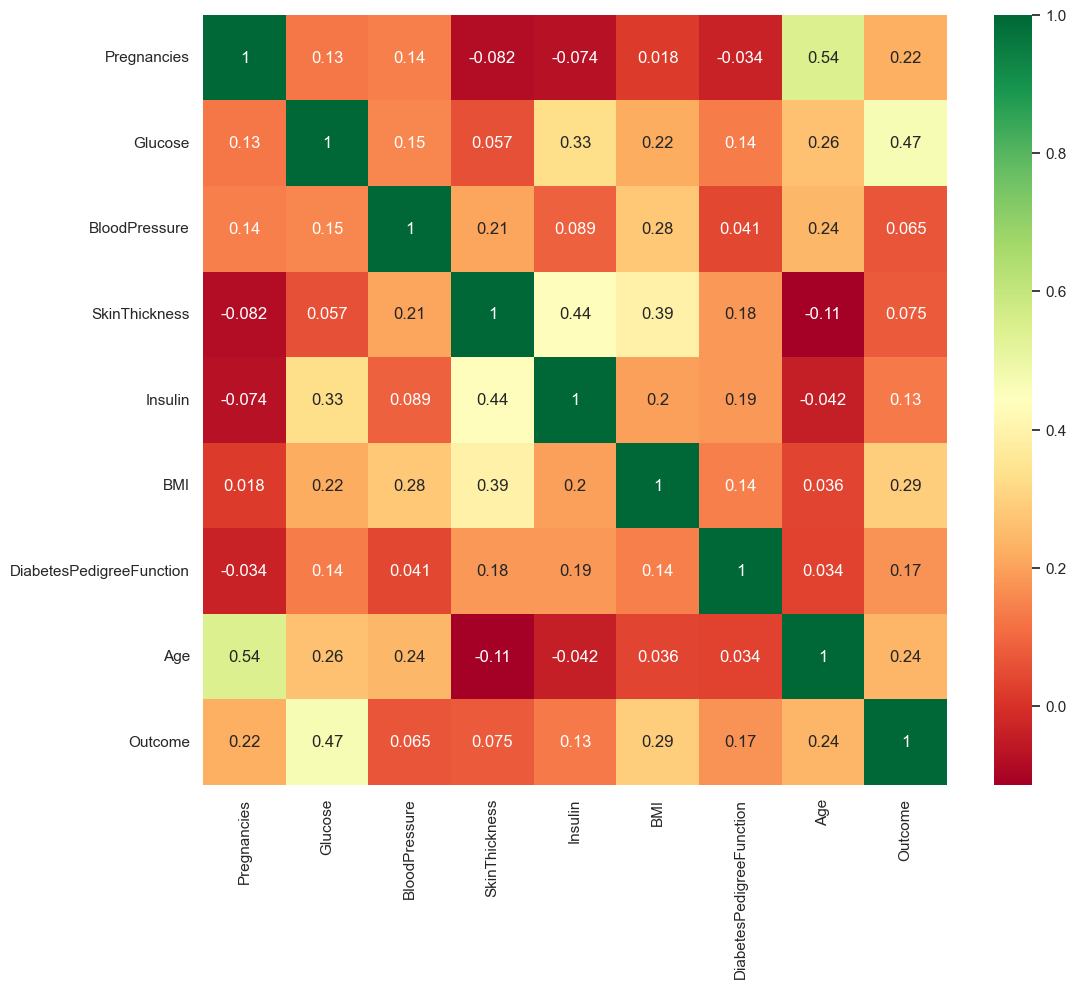

In [80]:
#HeatMaps
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')

In [81]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [82]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.862287      -0.032746       0.558557       NaN  0.165097   
1    -0.844885 -1.202229      -0.517645      -0.014657       NaN -0.846404   
2     1.233880  2.009241      -0.679278            NaN       NaN -1.323254   
3    -0.844885 -1.071148      -0.517645      -0.587871 -0.518847 -0.629654   
4    -1.141852  0.501816      -2.618874       0.558557  0.104968  1.537847   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [83]:
y = diabetes_copy.Outcome

In [84]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [95]:
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_iter = 1000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy: 2f}")

Accuracy:  0.722656


In [96]:
train_scores = np.append(train_scores, model.score(X_train, y_train))
test_scores = np.append(test_scores, model.score(X_test, y_test))

In [97]:
# Score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % '.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % 


In [98]:
# Score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % '.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.41176470588235 % 


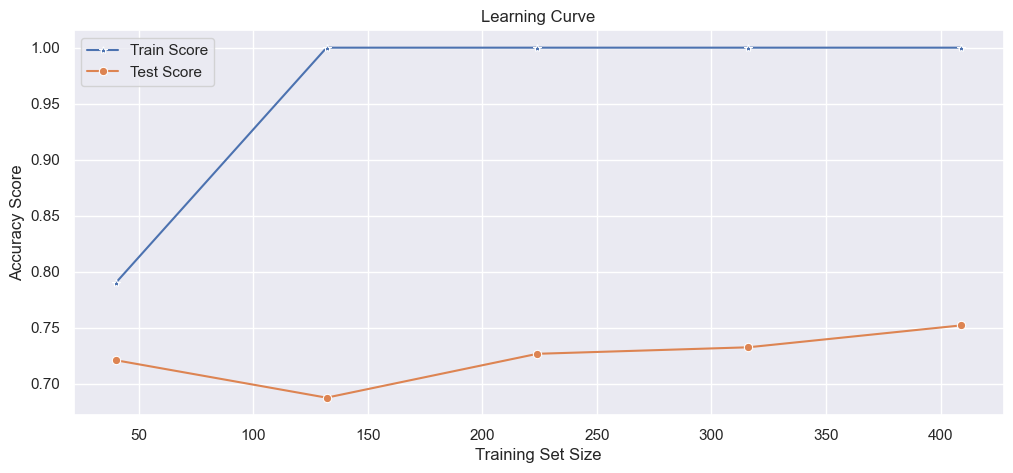

In [99]:
from sklearn.model_selection import learning_curve
train_sizes = [500, 1000, 1500, 2000, 2500]
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.figure(figsize=(12,5))
p = sns.lineplot(x=train_sizes, y=train_scores.mean(axis=1), marker='*', label='Train Score')
p = sns.lineplot(x=train_sizes, y=test_scores.mean(axis=1), marker='o', label='Test Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()

In [100]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          134  33  167
1           38  51   89
All        172  84  256

Text(0.5, 20.049999999999997, 'Predicted label')

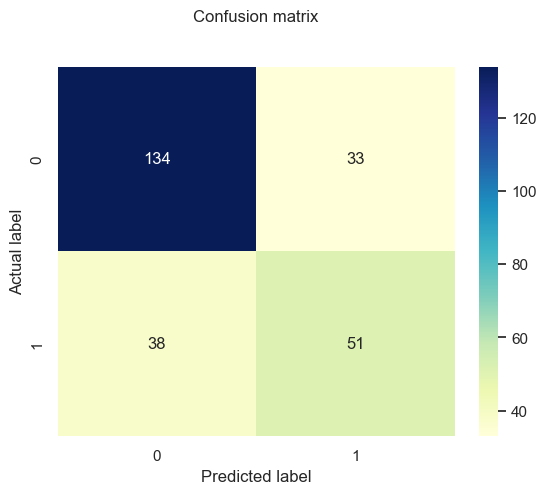

In [102]:
y_pred = model.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [103]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       167
           1       0.61      0.57      0.59        89

    accuracy                           0.72       256
   macro avg       0.69      0.69      0.69       256
weighted avg       0.72      0.72      0.72       256



In [105]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [107]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7792504877884681

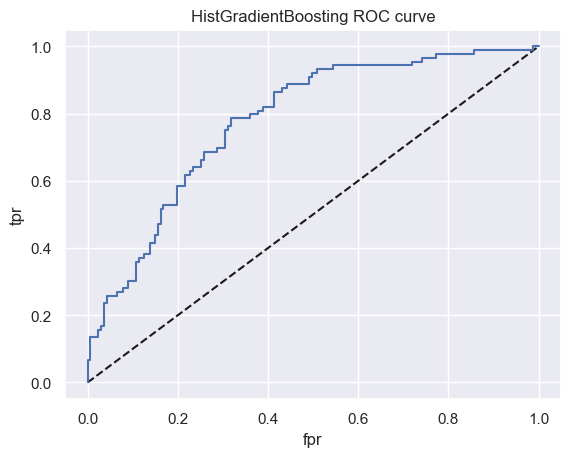

In [106]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('HistGradientBoosting ROC curve')
plt.show()